In [1]:
import sys
sys.path.append('../src/')
from vi_hrg import *
from utils import *
from torch import autograd
torch.manual_seed(82)

In [2]:
def noise_r(x, R, rel_var=0.1, epsilon=1e-4):
    rs = torch.distributions.normal.Normal(x, R*rel_var).sample() 
    return torch.clamp(rs, min=0+epsilon, max=R-epsilon)

In [3]:
def noise_phi(x, rel_var=0.1):
    phis = torch.distributions.normal.Normal(x, 2*np.pi*rel_var).sample()
    return phis % (2*np.pi)

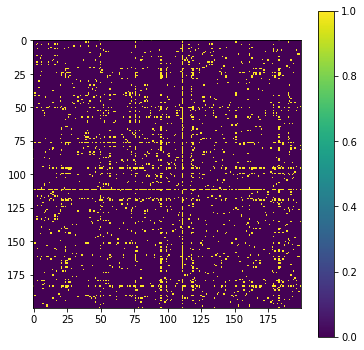

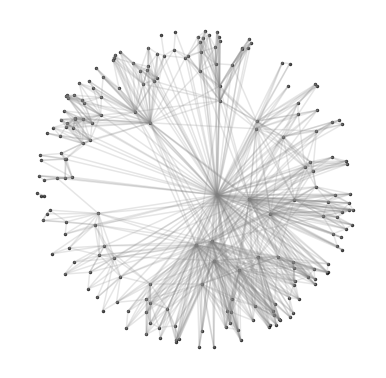

In [4]:
N = 200
R = 8.0
alpha = 0.8
T = 0.1

G = HRG(R=R, alpha=alpha, T=T)
r, theta, A = G.generate(N)
G.show()
G.plot()

In [5]:
A.sum().item()/N**2

0.0581

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 16576.82 | Epoch time 2.05
Epoch 2 | LR: 0.10 | Total loss: 12049.00 | Epoch time 1.85
Epoch 3 | LR: 0.10 | Total loss: 10754.45 | Epoch time 2.15
Epoch 4 | LR: 0.10 | Total loss: 10105.54 | Epoch time 1.98


 ../src/utils.py:128: UserWarning:edes_prob_arg has inf in it! 


Epoch 5 | LR: 0.10 | Total loss: 9679.48 | Epoch time 2.60
Epoch 6 | LR: 0.10 | Total loss: 9565.19 | Epoch time 2.42
Epoch 7 | LR: 0.10 | Total loss: 9189.15 | Epoch time 2.18
Epoch 8 | LR: 0.10 | Total loss: 9068.64 | Epoch time 2.21
Epoch 9 | LR: 0.10 | Total loss: 8942.13 | Epoch time 2.91
Epoch 10 | LR: 0.10 | Total loss: 8840.30 | Epoch time 2.54
Epoch 11 | LR: 0.10 | Total loss: 8826.86 | Epoch time 2.04
Epoch 12 | LR: 0.10 | Total loss: 8650.67 | Epoch time 2.15
Epoch 13 | LR: 0.10 | Total loss: 8578.11 | Epoch time 1.98
Epoch 14 | LR: 0.10 | Total loss: 8532.94 | Epoch time 2.06


 ../src/utils.py:126: UserWarning:edes_prob_arg has NaN in it! 


Epoch 15 | LR: 0.10 | Total loss: 8412.24 | Epoch time 2.25
Epoch 16 | LR: 0.10 | Total loss: 8353.58 | Epoch time 3.26
Epoch 17 | LR: 0.10 | Total loss: 8258.88 | Epoch time 4.36
Epoch 18 | LR: 0.10 | Total loss: 8183.02 | Epoch time 3.37
Epoch 19 | LR: 0.10 | Total loss: 8159.93 | Epoch time 2.83
Epoch 20 | LR: 0.10 | Total loss: 8155.03 | Epoch time 3.41
Epoch 21 | LR: 0.10 | Total loss: 8145.43 | Epoch time 2.20
Epoch 22 | LR: 0.10 | Total loss: 8057.95 | Epoch time 3.28
Epoch 23 | LR: 0.10 | Total loss: 7999.10 | Epoch time 3.08
Epoch 24 | LR: 0.10 | Total loss: 7971.64 | Epoch time 2.44
Epoch 25 | LR: 0.10 | Total loss: 8021.41 | Epoch time 2.47
Epoch 26 | LR: 0.10 | Total loss: 7949.29 | Epoch time 3.41
Epoch 27 | LR: 0.10 | Total loss: 7876.28 | Epoch time 3.07
Epoch 28 | LR: 0.10 | Total loss: 7914.18 | Epoch time 3.82
Epoch 29 | LR: 0.10 | Total loss: 7839.08 | Epoch time 3.09
Epoch 30 | LR: 0.10 | Total loss: 7760.64 | Epoch time 2.72
>>>>>>>>>>>> Training is finished.



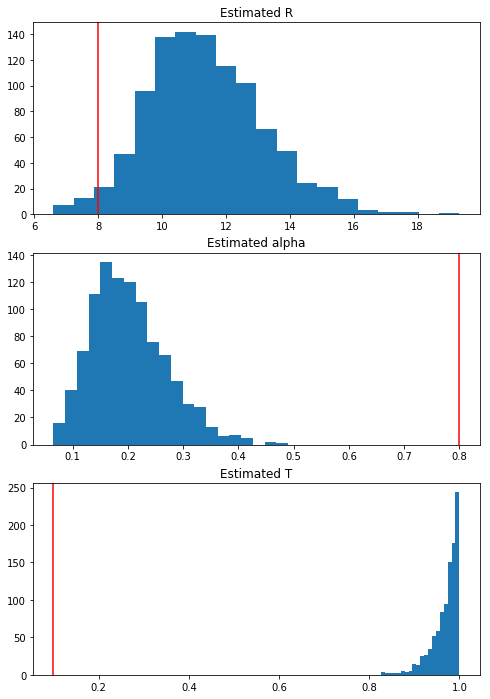

Likelihood: -7540.943145157879
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 18782.05 | Epoch time 2.63
Epoch 2 | LR: 0.10 | Total loss: 13341.55 | Epoch time 3.33
Epoch 3 | LR: 0.10 | Total loss: 11648.25 | Epoch time 2.10
Epoch 4 | LR: 0.10 | Total loss: 10814.03 | Epoch time 2.65


KeyboardInterrupt: 

In [6]:
for t in range(10):
    try:
        r_init = noise_r(r, R, rel_var=0.1)
        phi_init = noise_phi(theta, 0.1)

        r_loc_init = logit(r_init/R)
        r_scale_init = (torch.ones([N])/4).log()
        phi_loc_init = polar2cart(1, phi_init)
        phi_scale_init = (torch.ones([N])*30).log()
        R_conc_init = torch.tensor(10.).log()
        R_scale_init = torch.tensor(1.).log()
        alpha_conc_init = torch.tensor(.5).log()
        alpha_scale_init = torch.tensor(.5).log()
        T_init = torch.tensor([3.,10.]).log()
        dataloader = DataLoader(EdgesDataset(A), batch_size=int(N*8), num_workers=0, shuffle=True)
        vi = VI_HRG(N,20, init_values={'rs_loc':r_loc_init,
                                        'rs_scale':r_scale_init,
                                      'phis_loc':phi_loc_init,
                                      'phis_scale':phi_scale_init, 
                                      'R_conc':R_conc_init, 
                                      'R_scale':R_scale_init,
                                      'alpha_conc':alpha_conc_init,
                                      'alpha_scale':alpha_scale_init,
                                      'T':T_init},
                   fixed={'R':None, 
                          'T':None,
                          'alpha':None},
                   priors={'R_p':torch.tensor([20., 0.4]), 
                            'T_p':torch.tensor([1., 15.]),
                            'alpha_p':torch.tensor([27., 0.03])},)
        vi.train(dataloader, lrs=[0.1], debug=False, epochs=30)
        r_x_loc, r_x_scale, phi_x_loc, phi_x_scale, R_x_conc, R_x_scale, T_x, \
            alpha_x_conc, alpha_x_scale = vi.constrained_params()
        hist_samples = [1000]
        bins = 20
        R_samples = Gamma(R_x_conc, R_x_scale.reciprocal()).sample(hist_samples)
        alpha_samples = Gamma(alpha_x_conc, alpha_x_scale.reciprocal()).sample(hist_samples)
        T_samples = Beta(T_x[0], T_x[1]).sample(hist_samples)
        plt.figure(figsize=(8,12))
        
        plt.subplot(3, 1, 1)
        plt.hist(R_samples.numpy(), bins=bins)
        plt.axvline(R, color='r')
        plt.title('Estimated R')
        
        plt.subplot(3, 1, 2)
        plt.hist(alpha_samples.numpy(), bins=bins)
        plt.axvline(alpha, color='r')
        plt.title('Estimated alpha')
        
        plt.subplot(3, 1, 3)
        plt.hist(T_samples.numpy(), bins=bins)
        plt.axvline(T, color='r')
        plt.title('Estimated T')
        plt.show()
        print('Likelihood:', vi.likelihood())
    except Exception as e: 
        print(e)